In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.17 which is incompatible.


In [2]:
from workspace_utils import active_session

In [3]:
import os
import time
import random
import torch
import config
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from maddpg.agent import MaddpgAgent

In [4]:
random.seed(config.SEED)
np.random.seed(config.SEED)
torch.manual_seed(config.SEED)

In [5]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
# env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


In [7]:
maddpg_agent = MaddpgAgent(state_size, action_size, num_agents, config.SEED)

In [8]:
def train(agent, num_agents, n_episodes=10000, max_t=1000, max_score=0.5, model_path='.'):  
    scores = []
    scores_window = deque(maxlen=100)
    for i_episode in range(n_episodes+1):  
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset() 
        states = env_info.vector_observations
        score = np.zeros(num_agents)
        for steps in range(max_t):
            actions = agent.act(states, config.NOISE)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones, i_episode)  
            score += rewards
            states = next_states
            if np.any(dones):
                break
        scores.append(np.max(score))
        scores_window.append(np.max(score))
        avg_score = np.mean(scores_window)
        print(f'\rEpisode {i_episode}\tAverage Score: {avg_score}', end="")
        if i_episode>0 and i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {avg_score}')
        if (avg_score >=max_score):
            print(f'\rEnvironment solved in {i_episode-100} episodes with Average Score of {avg_score}')
            agent.save(model_path)
            break
    return scores

In [9]:
def visualize(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Scores')
    plt.xlabel('Episode')
    plt.show()

Episode 100	Average Score: 0.003900000061839819
Episode 200	Average Score: 0.010000000149011612
Episode 300	Average Score: 0.010600000172853478
Episode 400	Average Score: 0.012600000202655792
Episode 500	Average Score: 0.0009000000171363354
Episode 600	Average Score: 0.0010000000149011613
Episode 700	Average Score: 0.0018000000342726708
Episode 800	Average Score: 0.0139000002108514318
Episode 900	Average Score: 0.021400000341236595
Episode 1000	Average Score: 0.05890000095590949
Episode 1100	Average Score: 0.080700001269578945
Episode 1200	Average Score: 0.09180000144988298
Episode 1300	Average Score: 0.09350000148639083
Episode 1400	Average Score: 0.08840000148862683
Episode 1500	Average Score: 0.08740000143647193
Episode 1600	Average Score: 0.08920000143349178
Episode 1700	Average Score: 0.09000000141561032
Episode 1800	Average Score: 0.10330000162124633
Episode 1900	Average Score: 0.11220000173896551
Episode 2000	Average Score: 0.18380000278353692
Episode 2100	Average Score: 0.28440

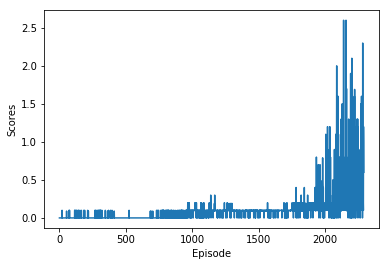

In [10]:
try:
    with active_session():
        scores = train(maddpg_agent, num_agents)
        visualize(scores)
except Exception as e:
    env.close()
    raise e

In [11]:
env.close()

In [12]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>